Import Packages

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load the Data

In [3]:
parent_dir = '../../data/philosopher/'

N = 500
M = 10_000
ITERATIONS = 10
# Load Scala benchmark data
scala_idle_raw_data = pd.read_csv(f'{parent_dir}3/philosopher_akka_actor_benchmark_idle_power.csv')
scala_bench_raw_data = pd.read_csv(f'{parent_dir}3/philosopher_akka_actor_benchmark_power_metrics.csv')

# Load Erlang benchmark data
erlang_idle_raw_data = pd.read_csv(f'{parent_dir}3/philosopher_benchmark_idle_power.csv')
erlang_bench_raw_data = pd.read_csv(f'{parent_dir}3/philosopher_benchmark_power_metrics.csv')

# Replace empty or missing values with "N/A" in non-numeric columns
scala_idle_raw_data.fillna("N/A", inplace=True)
scala_bench_raw_data.fillna("N/A", inplace=True)
erlang_idle_raw_data.fillna("N/A", inplace=True)
erlang_bench_raw_data.fillna("N/A", inplace=True)

Preview the Data

In [4]:
print("Scala Idle Raw Data:")
print(scala_idle_raw_data.shape)
scala_idle_raw_data.head()

Scala Idle Raw Data:
(10, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Mon Mar 31 03:43:37 2025 +0200) (510.21ms ela...,0.2700,0.00000,0.394,0.63,0.11,7.70,59.38 C,Nominal
1,(Mon Mar 31 03:43:37 2025 +0200) (508.51ms ela...,1.1900,0.03310,0.363,1.41,0.24,21.30,59.38 C,Nominal
2,(Mon Mar 31 03:43:38 2025 +0200) (506.90ms ela...,1.9500,0.00783,0.439,2.18,0.32,21.89,59.03 C,Nominal
3,(Mon Mar 31 03:43:38 2025 +0200) (509.31ms ela...,0.0614,0.00000,0.263,0.11,0.03,2.67,59.03 C,Nominal
4,(Mon Mar 31 03:43:39 2025 +0200) (508.32ms ela...,0.0658,0.00000,0.263,0.12,0.03,2.51,58.65 C,Nominal


In [5]:
print("Scala Benchmark Raw Data:")
print(scala_bench_raw_data.shape)
scala_bench_raw_data.head()

Scala Benchmark Raw Data:
(51, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Mon Mar 31 03:43:49 2025 +0200) (1010.81ms el...,36.0,0.0029,0.780,38.26,3.93,98.81,56.93 C,Nominal
1,(Mon Mar 31 03:43:50 2025 +0200) (1007.37ms el...,33.2,0.0000,0.524,35.38,3.92,98.64,60.30 C,Nominal
2,(Mon Mar 31 03:43:51 2025 +0200) (1006.36ms el...,34.0,0.0000,0.521,36.08,3.86,97.75,62.86 C,Nominal
3,(Mon Mar 31 03:43:52 2025 +0200) (1006.31ms el...,35.9,0.0000,0.562,38.30,3.90,98.27,65.05 C,Nominal
4,(Mon Mar 31 03:43:53 2025 +0200) (1006.01ms el...,35.0,0.0000,0.541,37.27,3.90,98.29,67.04 C,Nominal


In [6]:
print("Erlang Idle Raw Data:")
print(erlang_idle_raw_data.shape)
erlang_idle_raw_data.head()

Erlang Idle Raw Data:
(10, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Mon Mar 31 03:38:41 2025 +0200) (511.02ms ela...,0.3240,0.0000,0.279,0.43,0.12,6.43,54.06 C,Nominal
1,(Mon Mar 31 03:38:41 2025 +0200) (508.85ms ela...,1.2200,0.0326,0.347,1.43,0.27,22.06,54.06 C,Nominal
2,(Mon Mar 31 03:38:42 2025 +0200) (507.74ms ela...,0.0837,0.0000,0.278,0.13,0.03,2.28,54.02 C,Nominal
3,(Mon Mar 31 03:38:42 2025 +0200) (508.23ms ela...,0.3900,0.0000,0.364,0.62,0.24,21.43,54.02 C,Nominal
4,(Mon Mar 31 03:38:43 2025 +0200) (508.92ms ela...,0.0480,0.0000,0.258,0.09,0.03,2.17,53.93 C,Nominal


In [7]:
print("Erlang Benchmark Raw Data:")
print(erlang_bench_raw_data.shape)
erlang_bench_raw_data.head()

Erlang Benchmark Raw Data:
(166, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Mon Mar 31 03:38:53 2025 +0200) (1007.25ms el...,25.7,0.00000,0.315,26.22,3.53,96.92,53.93 C,Nominal
1,(Mon Mar 31 03:38:54 2025 +0200) (1005.34ms el...,25.1,0.00000,0.299,25.65,3.41,96.97,56.57 C,Nominal
2,(Mon Mar 31 03:38:55 2025 +0200) (1004.78ms el...,29.5,0.00000,0.584,30.13,3.90,99.07,58.72 C,Nominal
3,(Mon Mar 31 03:38:56 2025 +0200) (1005.66ms el...,26.2,0.00364,0.411,26.79,3.56,98.15,61.13 C,Nominal
4,(Mon Mar 31 03:38:57 2025 +0200) (1004.96ms el...,25.0,0.00000,0.303,25.52,3.28,95.92,62.81 C,Nominal


Clean the Data

In [8]:
def clean_data(df):
    df_copy = df.copy() 
    
    # Convert Timestamp to datetime format (extract date-time pattern)
    df_copy['Timestamp'] = pd.to_datetime(
        df['Timestamp'].str.extract(r'(\w{3} \w{3} \d{1,2} \d{2}:\d{2}:\d{2} \d{4})')[0], 
        errors='coerce'
    )

    # Extract elapsed time in milliseconds
    df_copy['Time Elapsed (ms)'] = pd.to_numeric(
        df['Timestamp'].str.extract(r'\((\d+\.\d+)ms elapsed\)')[0], 
        errors='coerce'
    )
    
    # Extract numeric temperature values
    df_copy['CPU Temp(C)'] = df['CPU Temp(C)'].str.extract(r'(\d+\.\d+|\d+)').astype(float)

    # Fill N/A values with 0 for numerical columns
    df_copy = df_copy.fillna(0)
    
    return df_copy

In [9]:
scala_idle_data = clean_data(scala_idle_raw_data)
scala_bench_data = clean_data(scala_bench_raw_data)
erlang_idle_data = clean_data(erlang_idle_raw_data)
erlang_bench_data = clean_data(erlang_bench_raw_data)

Verify Cleaned Data

In [10]:
print("Scala Idle Clean Data:")
print(scala_idle_data.shape)
scala_idle_data.head()

Scala Idle Clean Data:
(10, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-03-31 03:43:37,0.2700,0.00000,0.394,0.63,0.11,7.70,59.38,Nominal,510.21
1,2025-03-31 03:43:37,1.1900,0.03310,0.363,1.41,0.24,21.30,59.38,Nominal,508.51
2,2025-03-31 03:43:38,1.9500,0.00783,0.439,2.18,0.32,21.89,59.03,Nominal,506.90
3,2025-03-31 03:43:38,0.0614,0.00000,0.263,0.11,0.03,2.67,59.03,Nominal,509.31
4,2025-03-31 03:43:39,0.0658,0.00000,0.263,0.12,0.03,2.51,58.65,Nominal,508.32


In [11]:
print("Scala Benchmark Clean Data:")
print(scala_bench_data.shape)
scala_bench_data.head()


Scala Benchmark Clean Data:
(51, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-03-31 03:43:49,36.0,0.0029,0.780,38.26,3.93,98.81,56.93,Nominal,1010.81
1,2025-03-31 03:43:50,33.2,0.0000,0.524,35.38,3.92,98.64,60.30,Nominal,1007.37
2,2025-03-31 03:43:51,34.0,0.0000,0.521,36.08,3.86,97.75,62.86,Nominal,1006.36
3,2025-03-31 03:43:52,35.9,0.0000,0.562,38.30,3.90,98.27,65.05,Nominal,1006.31
4,2025-03-31 03:43:53,35.0,0.0000,0.541,37.27,3.90,98.29,67.04,Nominal,1006.01


In [12]:
print("Erlang Idle Clean Data:")
print(erlang_idle_data.shape)
erlang_idle_data.head()


Erlang Idle Clean Data:
(10, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-03-31 03:38:41,0.3240,0.0000,0.279,0.43,0.12,6.43,54.06,Nominal,511.02
1,2025-03-31 03:38:41,1.2200,0.0326,0.347,1.43,0.27,22.06,54.06,Nominal,508.85
2,2025-03-31 03:38:42,0.0837,0.0000,0.278,0.13,0.03,2.28,54.02,Nominal,507.74
3,2025-03-31 03:38:42,0.3900,0.0000,0.364,0.62,0.24,21.43,54.02,Nominal,508.23
4,2025-03-31 03:38:43,0.0480,0.0000,0.258,0.09,0.03,2.17,53.93,Nominal,508.92


In [13]:
print("Erlang Benchmark Clean Data:")
print(erlang_bench_data.shape)
erlang_bench_data.head()

Erlang Benchmark Clean Data:
(166, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-03-31 03:38:53,25.7,0.00000,0.315,26.22,3.53,96.92,53.93,Nominal,1007.25
1,2025-03-31 03:38:54,25.1,0.00000,0.299,25.65,3.41,96.97,56.57,Nominal,1005.34
2,2025-03-31 03:38:55,29.5,0.00000,0.584,30.13,3.90,99.07,58.72,Nominal,1004.78
3,2025-03-31 03:38:56,26.2,0.00364,0.411,26.79,3.56,98.15,61.13,Nominal,1005.66
4,2025-03-31 03:38:57,25.0,0.00000,0.303,25.52,3.28,95.92,62.81,Nominal,1004.96


Visualize the Data

In [14]:
def plot_graphs(idle_df, bench_df, title_prefix):
    """
    Creates side-by-side subplots for each metric, plotting idle (left) and benchmark (right),
    using elapsed time on the x-axis.
    """
    columns_to_plot = [
        "CPU Core Power(W)", "GT Power(W)", "DRAM Power(W)", 
        "(CPUs+GT+SA) Power(W)", "Avg Num Cores Active", "CPU Temp(C)"
    ]

    sns.set_theme(style="whitegrid", palette="muted")

    # Create a copy of the dataframes to avoid modifying the original data
    idle_df = idle_df.copy()
    bench_df = bench_df.copy()
    

    # Compute elapsed time starting from t=0
    idle_df["Elapsed Time (s)"] = (idle_df["Time Elapsed (ms)"].cumsum() - idle_df["Time Elapsed (ms)"].iloc[0]) / 1000
    bench_df["Elapsed Time (s)"] = (bench_df["Time Elapsed (ms)"].cumsum() - bench_df["Time Elapsed (ms)"].iloc[0]) / 1000

    for column in columns_to_plot:
        fig, axes = plt.subplots(1, 2, figsize=(12, 5))

        # Plot Idle data on the first subplot
        sns.lineplot(data=idle_df, x="Elapsed Time (s)", y=column, label="Idle", color='blue', linestyle='--', ax=axes[0])
        axes[0].set_title(f"Idle - {column}", fontsize=12)
        axes[0].set_xlabel("Elapsed Time (s)", fontsize=10)
        axes[0].set_ylabel(column, fontsize=10)
        axes[0].legend()
        axes[0].grid(True)

        # Plot Benchmark data on the second subplot
        sns.lineplot(data=bench_df, x="Elapsed Time (s)", y=column, label="Benchmark", color='red', ax=axes[1])
        axes[1].set_title(f"Benchmark - {column}", fontsize=12)
        axes[1].set_xlabel("Elapsed Time (s)", fontsize=10)
        axes[1].set_ylabel(column, fontsize=10)
        axes[1].legend()
        axes[1].grid(True)

        # Main figure title
        fig.suptitle(f"{title_prefix} - {column}", fontsize=14)
        
        # Adjust layout to avoid overlap
        plt.tight_layout(rect=[0, 0, 1, 0.95]) 
        plt.show()


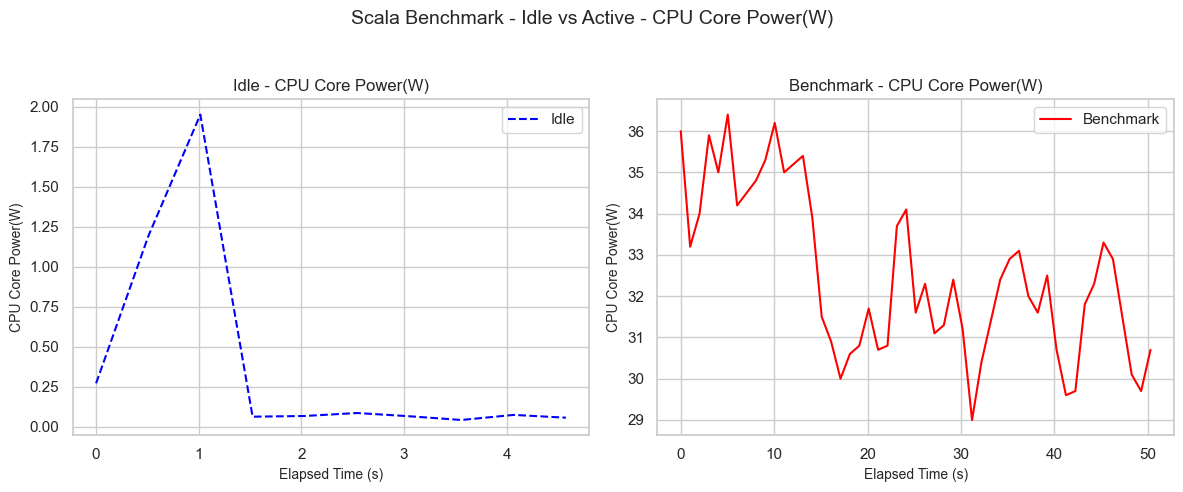

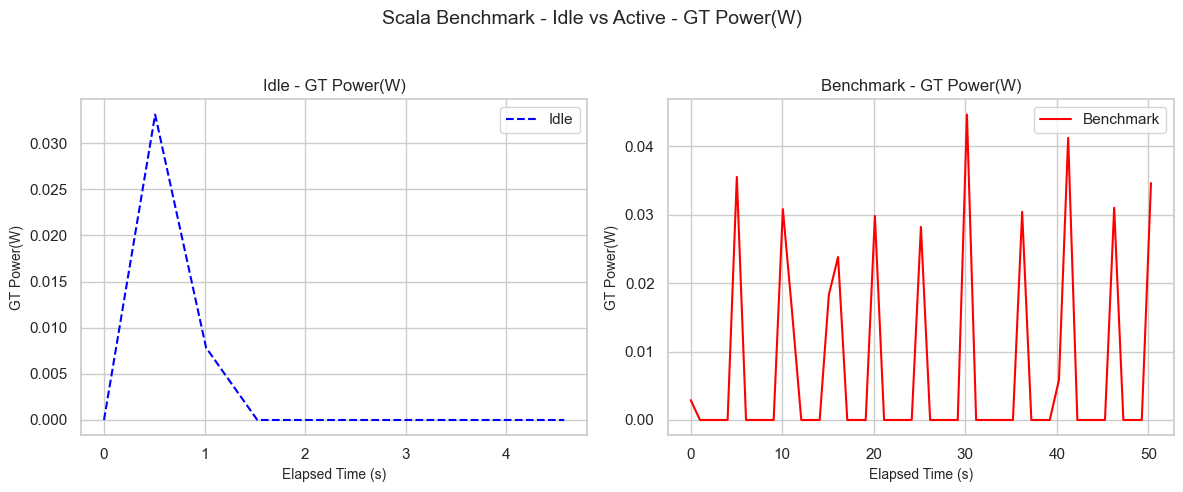

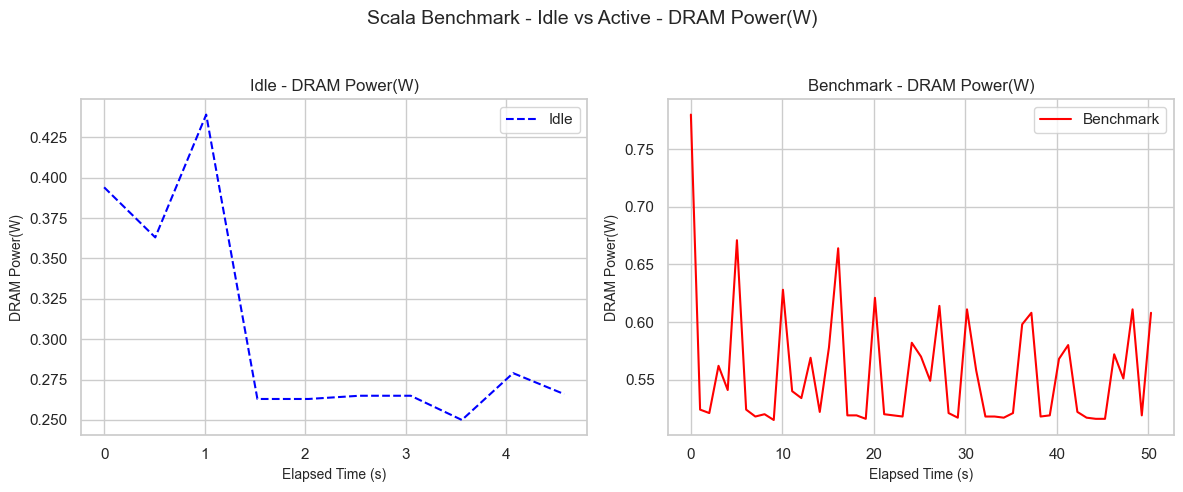

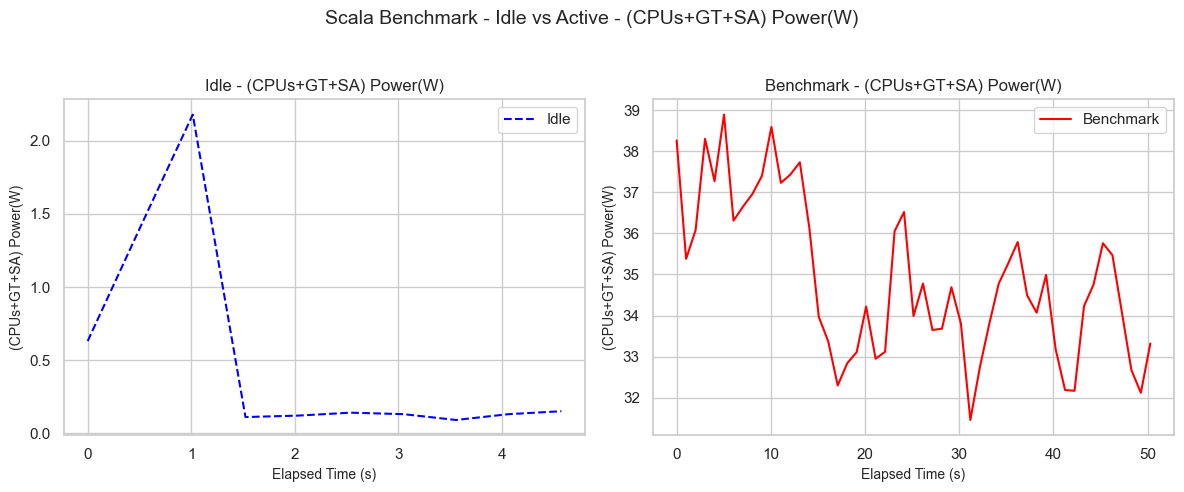

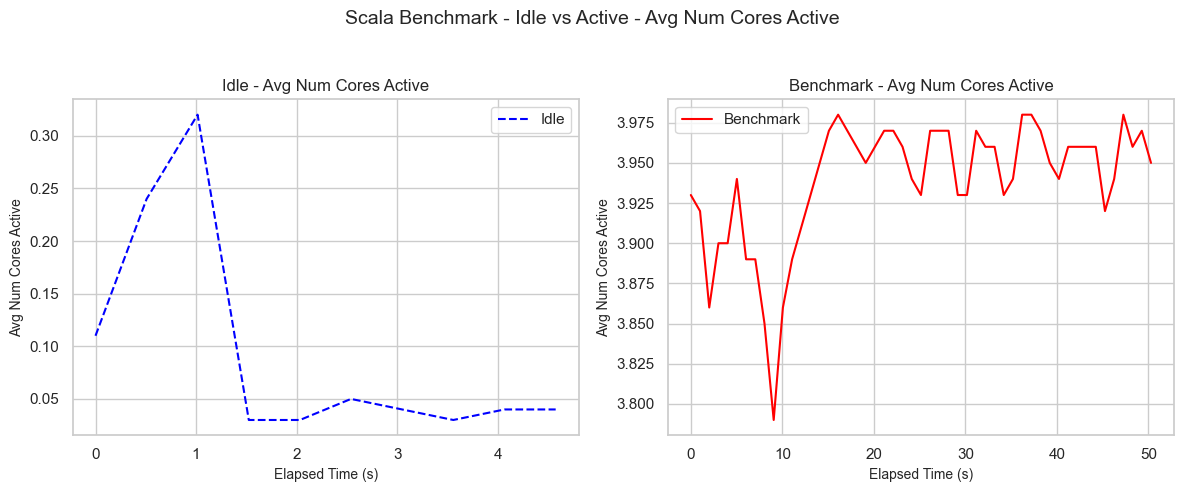

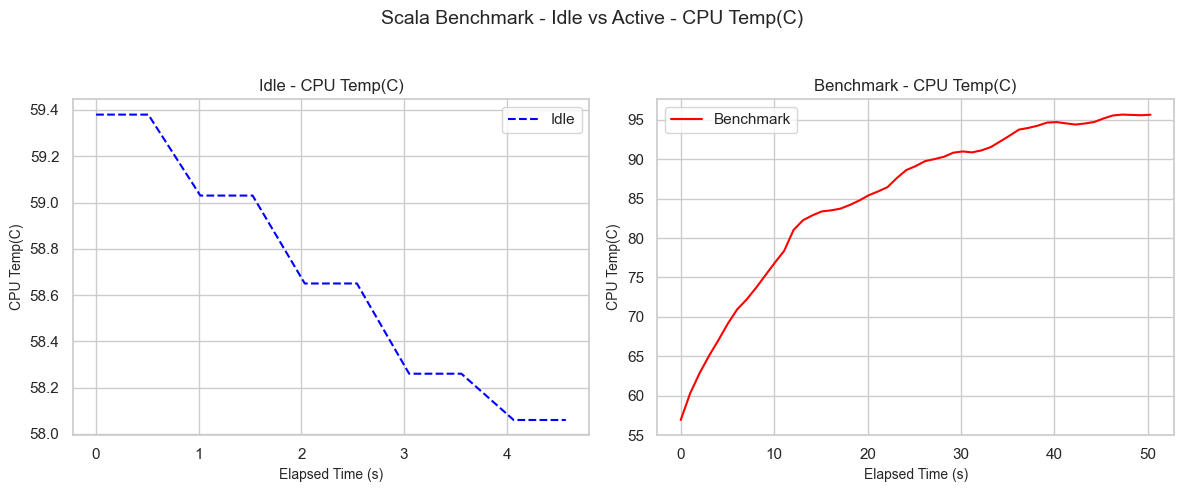

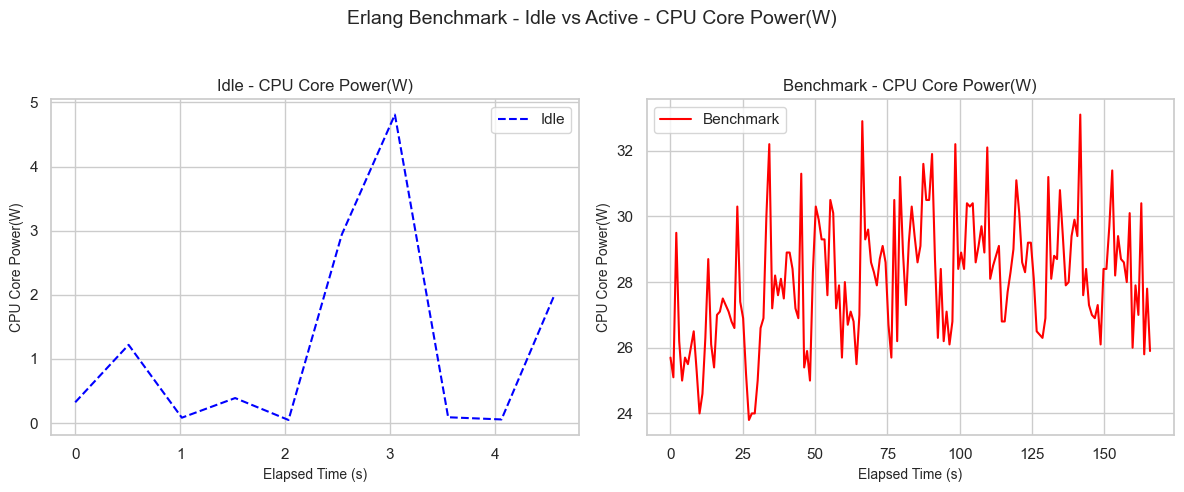

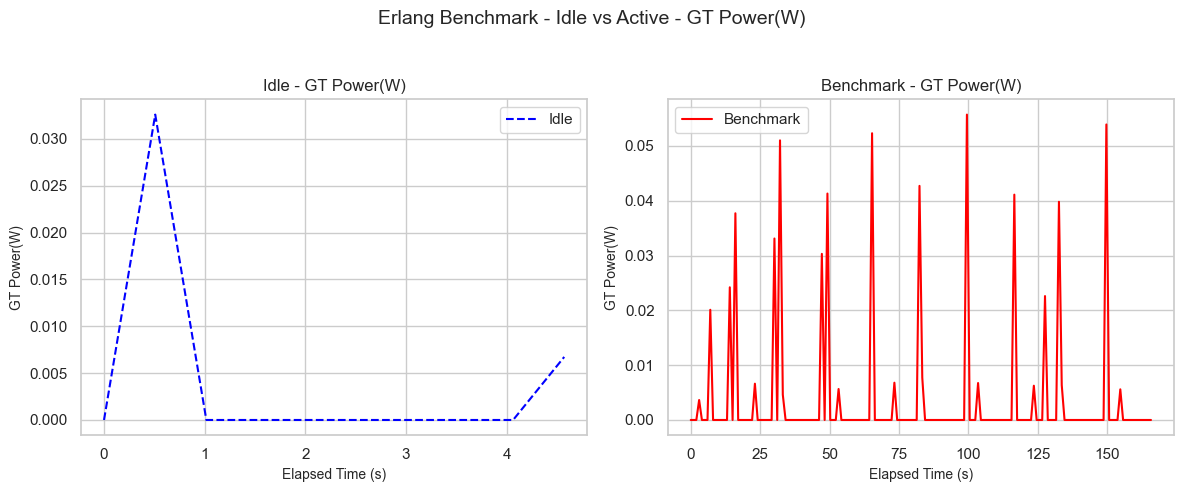

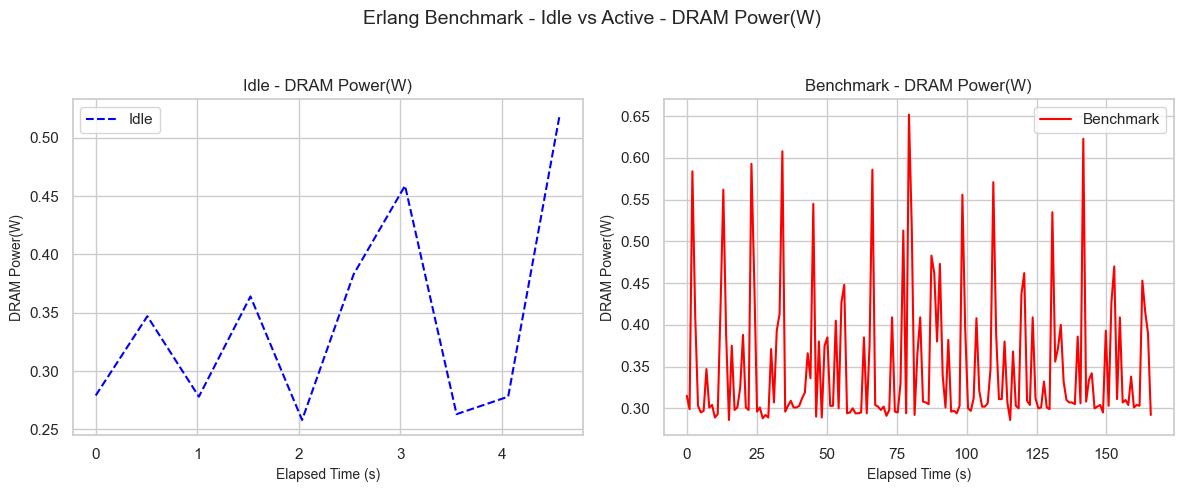

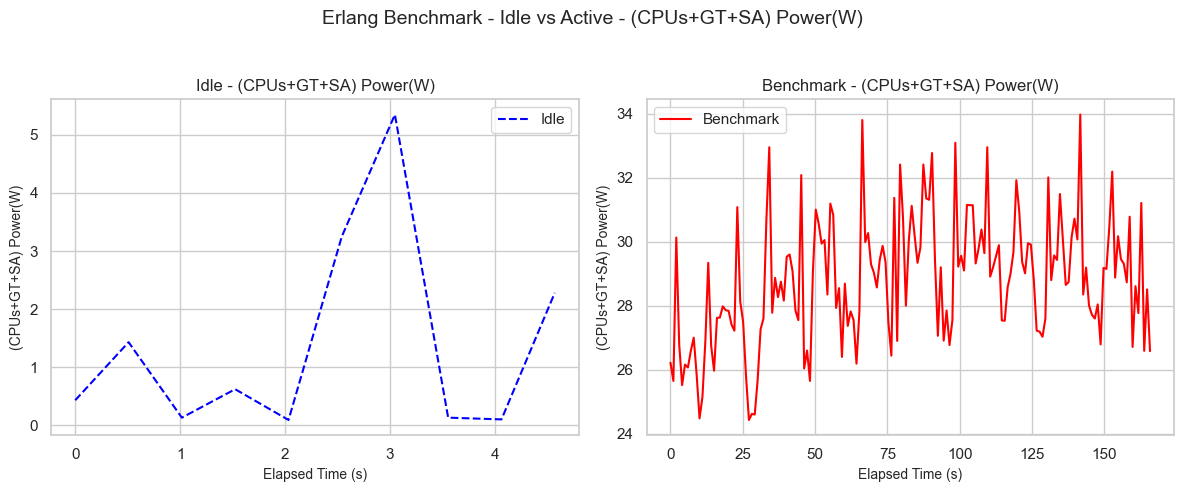

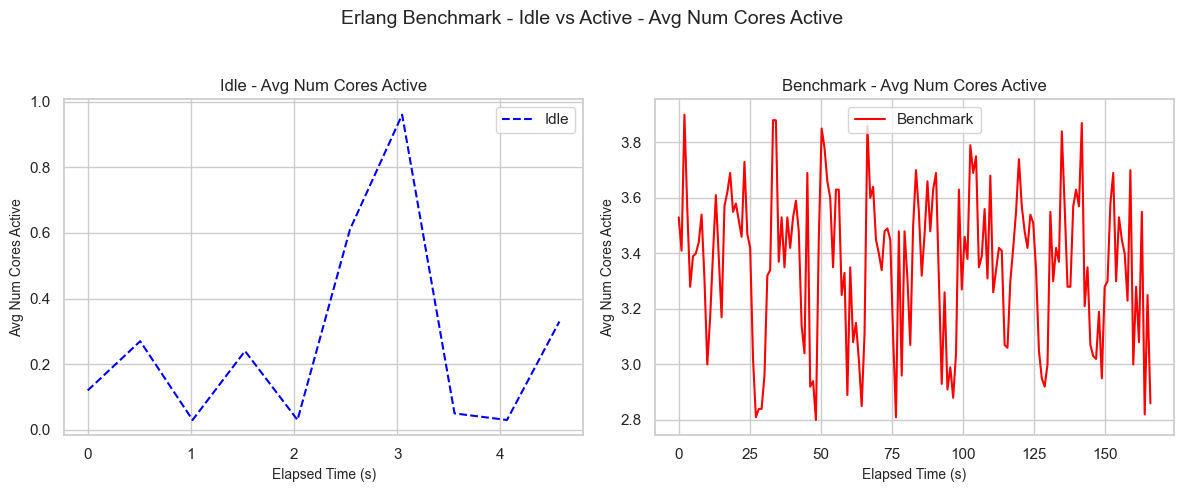

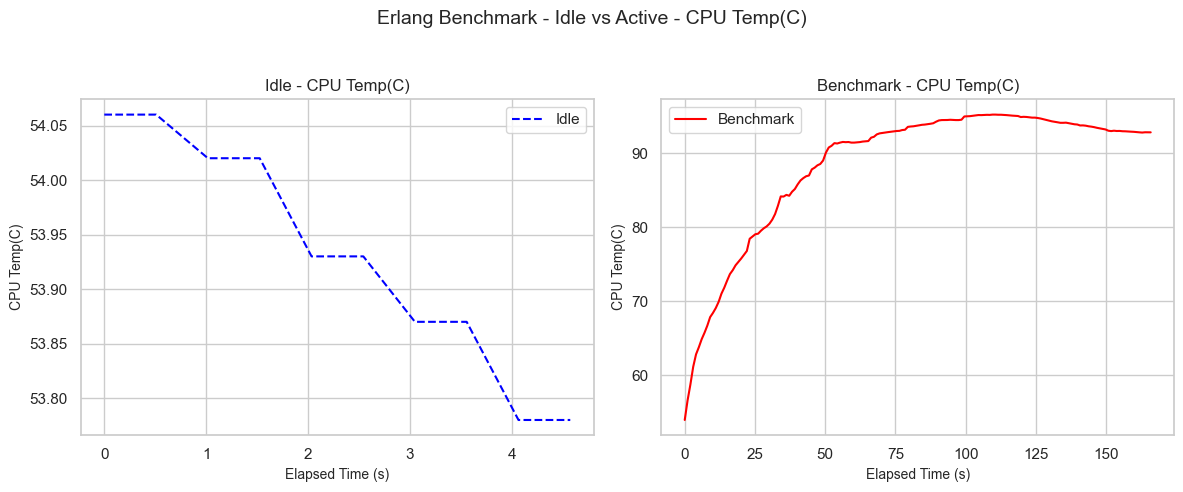

In [15]:
plot_graphs(scala_idle_data, scala_bench_data, "Scala Benchmark - Idle vs Active")
plot_graphs(erlang_idle_data, erlang_bench_data, "Erlang Benchmark - Idle vs Active")

In [16]:
def plot_erlang_vs_scala(erlang_df, scala_df, idle_erlang_df, idle_scala_df, title_prefix):
    """
    Plots Erlang and Scala benchmark data with elapsed time starting at t=0,
    after subtracting corresponding idle values.
    """
    columns_to_plot = [
        "CPU Core Power(W)", "GT Power(W)", "DRAM Power(W)", 
        "(CPUs+GT+SA) Power(W)", "Avg Num Cores Active", "CPU Temp(C)"
    ]

    sns.set_theme(style="whitegrid", palette="muted")

    # Create a copy of the dataframes to avoid modifying the original data
    erlang_df = erlang_df.copy()
    scala_df = scala_df.copy()

    # Normalize elapsed time to start from t=0
    erlang_df["Elapsed Time (s)"] = (erlang_df["Time Elapsed (ms)"].cumsum() - erlang_df["Time Elapsed (ms)"].iloc[0]) / 1000
    scala_df["Elapsed Time (s)"] = (scala_df["Time Elapsed (ms)"].cumsum() - scala_df["Time Elapsed (ms)"].iloc[0]) / 1000


    for column in columns_to_plot:
        fig, ax = plt.subplots(figsize=(10, 5))

        # Subtract idle values
        erlang_df["Adjusted " + column] = np.maximum(0, erlang_df[column] - idle_erlang_df[column].mean())
        scala_df["Adjusted " + column] = np.maximum(0, scala_df[column] - idle_scala_df[column].mean())

        # Plot Erlang benchmark
        sns.lineplot(data=erlang_df, x="Elapsed Time (s)", y="Adjusted " + column, label="Erlang", color='blue', ax=ax)

        # Plot Scala benchmark
        sns.lineplot(data=scala_df, x="Elapsed Time (s)", y="Adjusted " + column, label="Scala", color='red', ax=ax)

        # Main figure title
        ax.set_title(f"{title_prefix} - {column}", fontsize=14)
        ax.set_xlabel("Elapsed Time (s)", fontsize=12)
        ax.set_ylabel(column, fontsize=12)
        ax.legend()
        ax.grid(True)

        plt.tight_layout()
        plt.show()


In [17]:
def format_number_str(num):
    """Formats large numbers into shortened notation (e.g., 1B, 100M, 10M)."""
    if num >= 1_000_000_000:
        return f"{num // 1_000_000_000}B"
    elif num >= 1_000_000:
        return f"{num // 1_000_000}M"
    elif num >= 1_000:
        return f"{num // 1_000}K"
    return str(num)

n = format_number_str(N)
m = format_number_str(M)
title_config_prefix = f"({n} Philosophers, {m} Eating Rounds, {ITERATIONS} Iterations)"

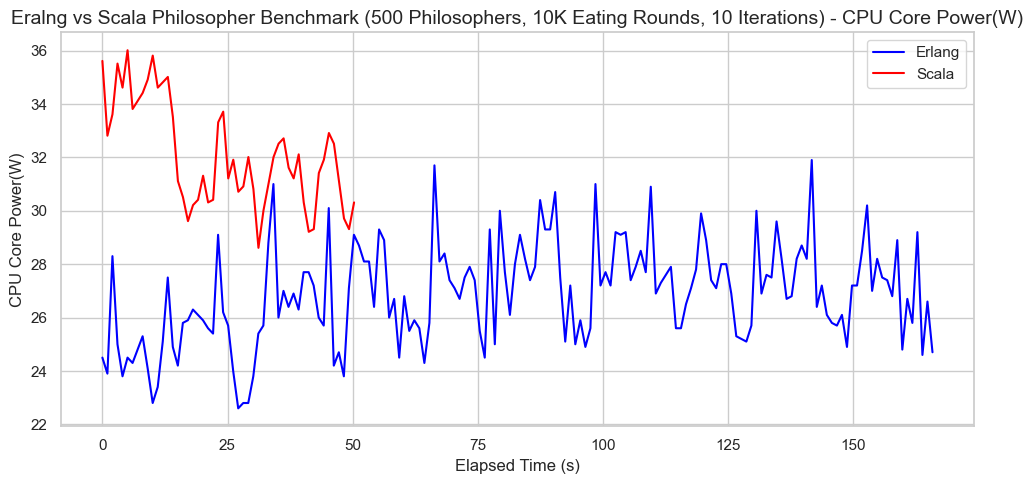

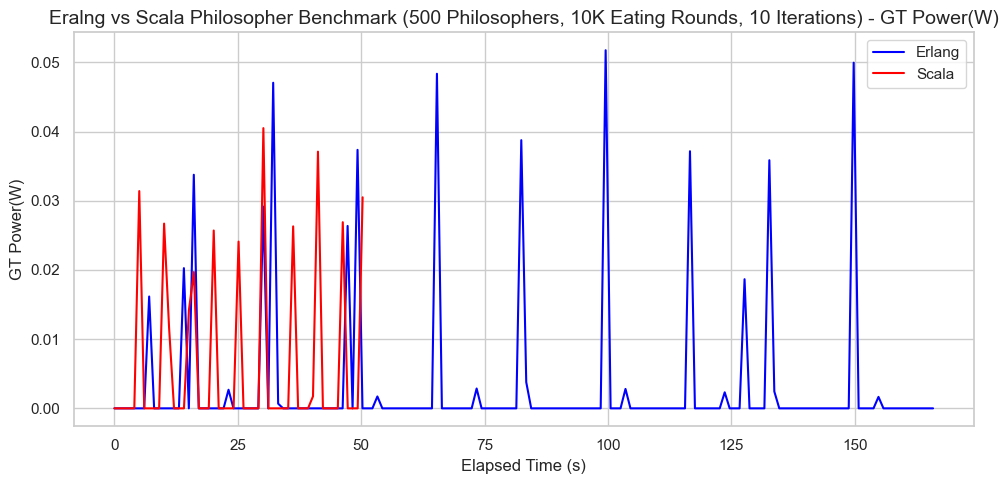

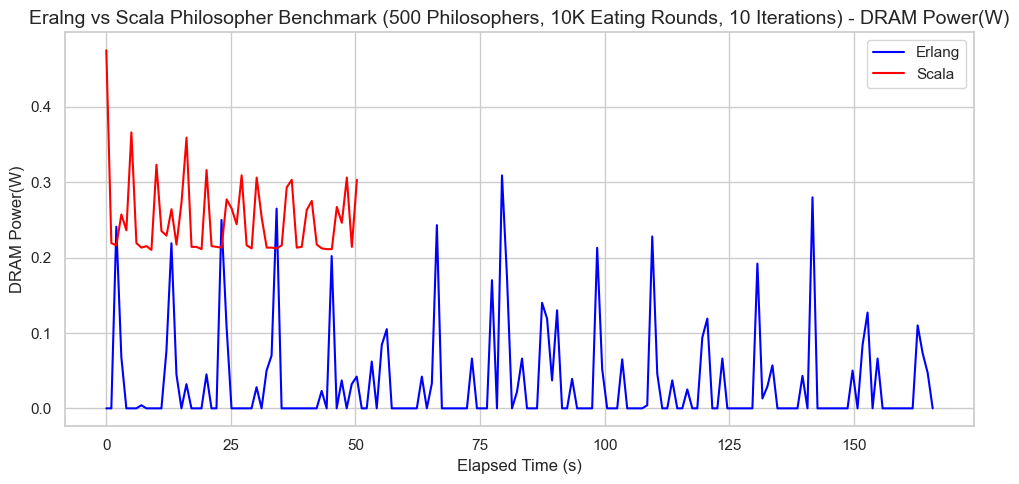

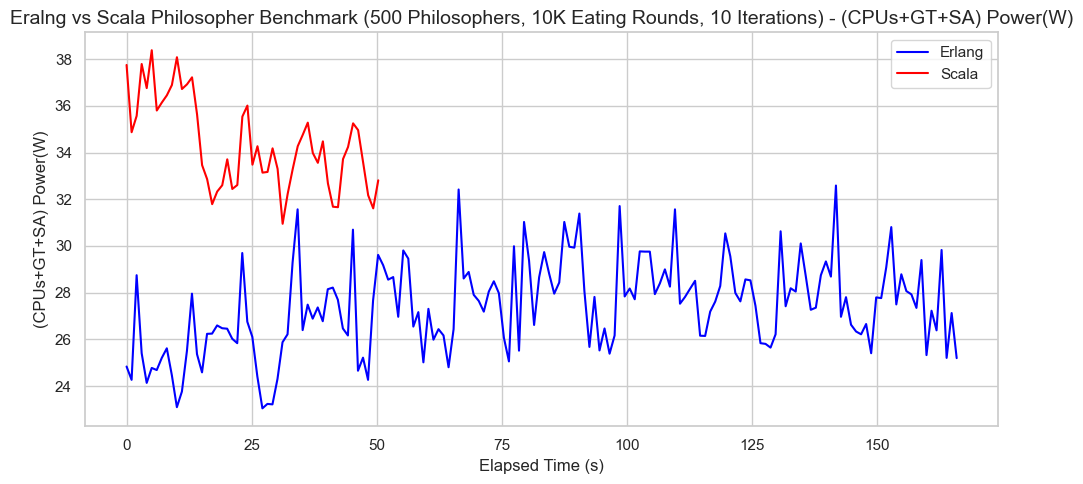

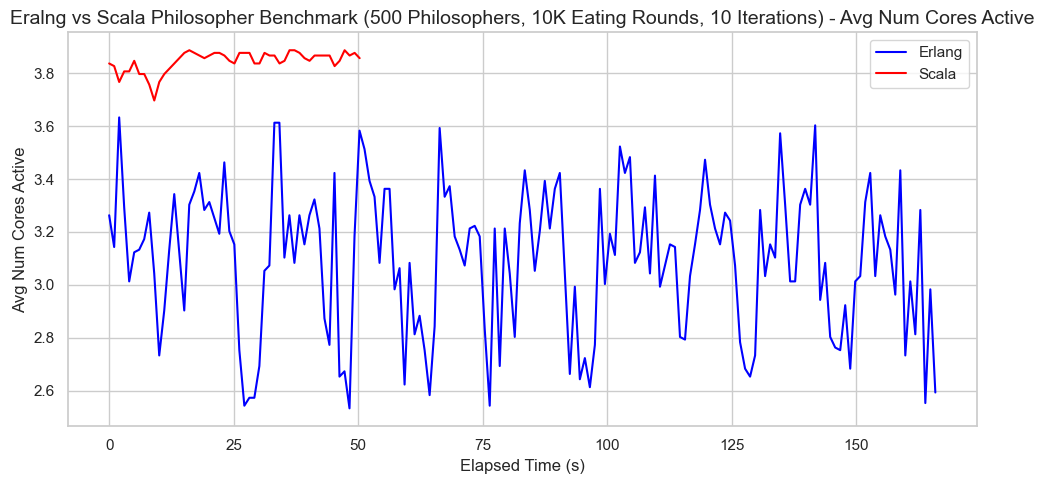

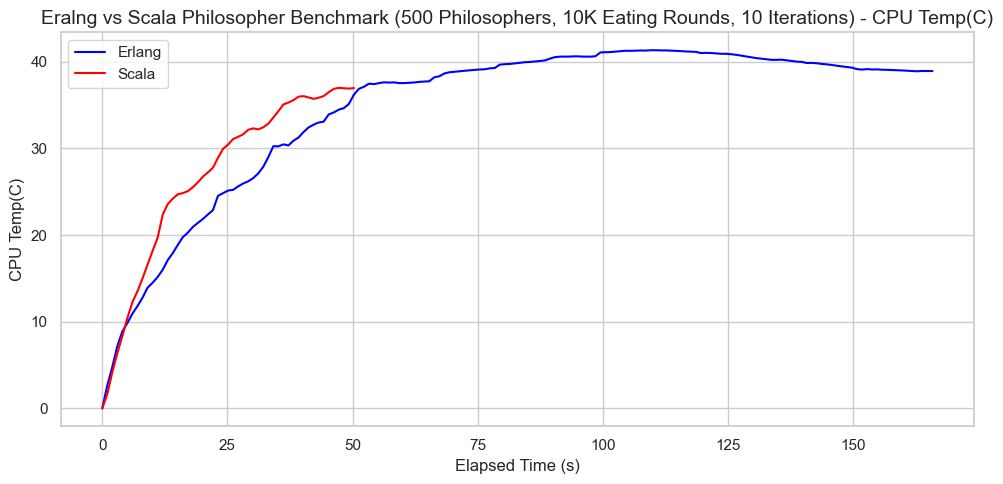

In [18]:
plot_erlang_vs_scala(erlang_bench_data, scala_bench_data, erlang_idle_data, scala_idle_data, f"Eralng vs Scala Philosopher Benchmark {title_config_prefix}")


Compute Average Metrics

In [19]:
metrics_columns = ["CPU Core Power(W)", "GT Power(W)", "DRAM Power(W)", "(CPUs+GT+SA) Power(W)","CPU Temp(C)", "Avg Num Cores Active"]

In [20]:
# Compute mean idle values for each metric
scala_idle_means = scala_idle_data[metrics_columns].mean()
erlang_idle_means = erlang_idle_data[metrics_columns].mean()

# Subtract the mean idle values from each row in the benchmark data
scala_net_avgs = (scala_bench_data[metrics_columns] - scala_idle_means).mean()
erlang_net_avgs = (erlang_bench_data[metrics_columns] - erlang_idle_means).mean()

print("Net Average Metrics Comparison:\n")
print("Scala Benchmark:")
print(scala_net_avgs, "\n")
print("Erlang Benchmark:")
print(erlang_net_avgs)

Net Average Metrics Comparison:

Scala Benchmark:
CPU Core Power(W)        32.110648
GT Power(W)               0.003215
DRAM Power(W)             0.251418
(CPUs+GT+SA) Power(W)    34.373745
CPU Temp(C)              26.631451
Avg Num Cores Active      3.845824
dtype: float64 

Erlang Benchmark:
CPU Core Power(W)        26.871425
GT Power(W)              -0.000284
DRAM Power(W)             0.010004
(CPUs+GT+SA) Power(W)    27.405566
CPU Temp(C)              34.595590
Avg Num Cores Active      3.097639
dtype: float64


Compute Total Energy Consumption

In [21]:
# Calculate total elapsed time
scala_total_time = scala_bench_data["Time Elapsed (ms)"].sum() / 1000
erlang_total_time = erlang_bench_data["Time Elapsed (ms)"].sum() / 1000

# Calculate total elapsed time using timestamps (convert to seconds)
# scala_total_time = (scala_bench_data["Timestamp"].iloc[-1] - scala_bench_data["Timestamp"].iloc[0]).total_seconds()
# erlang_total_time = (erlang_bench_data["Timestamp"].iloc[-1] - erlang_bench_data["Timestamp"].iloc[0]).total_seconds()

# Compute total energy consumption
scala_total_energy = scala_net_avgs["(CPUs+GT+SA) Power(W)"] * scala_total_time
erlang_total_energy = erlang_net_avgs["(CPUs+GT+SA) Power(W)"] * erlang_total_time

# Create a DataFrame for the new row
new_row = pd.DataFrame([{
    "Iterations": ITERATIONS,
    "N": N,
    "M": M,
    "Erlang Energy Consumption(J)": erlang_total_energy,
    "Scala Energy Consumption(J)": scala_total_energy
}])

# Define CSV file path
csv_filename = os.path.join(parent_dir, "aggregate_energy_results.csv")

# Check if the file exists
if os.path.exists(csv_filename):
    # Load existing data
    existing_data = pd.read_csv(csv_filename)
    
    # Check if the row with the same (Number of Messages, Iterations) already exists
    duplicate_row = existing_data[
        (existing_data["N"] == N) & 
        (existing_data["M"] == M) &
        (existing_data["Iterations"] == ITERATIONS)
    ]
    
    if not duplicate_row.empty:
        print("Skipping duplicate entry for N =", N, "M =", M, "and Iterations =", ITERATIONS)
    else:
        # Append new row
        new_row.to_csv(csv_filename, mode='a', header=False, index=False)
        print("Results appended to", csv_filename)
else:
    # Save with header if file does not exist
    new_row.to_csv(csv_filename, mode='w', header=True, index=False)
    print("File created and results saved to", csv_filename)

# Print the computed values
print("\nTotal Energy Consumption Comparison:")
print("Scala Benchmark:", scala_total_energy,"Joules")
print("Erlang Benchmark:", erlang_total_energy,"Joules")


Results appended to ../../data/philosopher/aggregate_energy_results.csv

Total Energy Consumption Comparison:
Scala Benchmark: 1763.1964424796079 Joules
Erlang Benchmark: 4572.77768360964 Joules
